<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool
4. Dropout              - Regularization Technique  
5. Batch Normalization 
6. Image augmentation of random rotation between -5 to +5 degrees

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 
3.  In this step I will change the architecture from step4 by introducing StepLR with step size 7 and gamma value 0.1. 

Target: 
======

In this step

1. I decreased the number of parameters and now it's slightly over 6k 
3. Target is to achieve over 99.4% validation accuracy 
4. Run it for less than 15 epochs to study how the accuracy changes with Image Augmentation technique

Result: 
======
1. Observed Train accuracy: 98.92%
2. Validation accuracy:99.4%
3. Number of parameters: 6,054


Analysis: 
========

1. The accuracy just touched 99.4% but not seems to be stabilized better. I didn't expect this behaviour 
2. I believe that the channel distribution could be wrong. Let me try one last option to play around with channels 

In [2]:
from model import model11 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.069
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
       BatchNorm2d-3           [-1, 10, 28, 28]              20
         Dropout2d-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 11, 28, 28]             990
              ReLU-6           [-1, 11, 28, 28]               0
       BatchNorm2d-7           [-1, 11, 28, 28]              22
         Dropout2d-8           [-1, 11, 28, 28]               0
         MaxPool2d-9           [-1, 11, 14, 14]               0
           Conv2d-10           [-1, 12, 14, 14]           1,188
             ReLU-11           [-1, 12, 14, 14]               0
      BatchNorm2d-12           [-1, 12, 14, 14]              24
        Dropout2d-13           [-1, 12, 14, 14]               0
           Conv2d-14           [-1, 12,

G:\TSAI-ERA\Session 7\model.py:661: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader_rotation, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 64
rotation_range = (-5.0, 5.0)
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader_rotation(batch_size, rotation_range, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [6]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.069).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.019, momentum=0.9)
scheduler = StepLR(optimizer, step_size=7, gamma=0.1)
for epoch in range(1, 15):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    scheduler.step()

Currently Executing Epoch: 1


Loss=0.11707156151533127 Batch_id=937 Accuracy=93.58: 100%|██████████████████████████| 938/938 [01:06<00:00, 14.14it/s]



Test set: Average loss: 0.0531, Accuracy: 9821/10000 (98.21%)

Currently Executing Epoch: 2


Loss=0.06791634112596512 Batch_id=937 Accuracy=97.52: 100%|██████████████████████████| 938/938 [01:09<00:00, 13.43it/s]



Test set: Average loss: 0.0339, Accuracy: 9888/10000 (98.88%)

Currently Executing Epoch: 3


Loss=0.06433723121881485 Batch_id=937 Accuracy=98.00: 100%|██████████████████████████| 938/938 [01:06<00:00, 14.07it/s]



Test set: Average loss: 0.0281, Accuracy: 9910/10000 (99.10%)

Currently Executing Epoch: 4


Loss=0.08207173645496368 Batch_id=937 Accuracy=98.16: 100%|██████████████████████████| 938/938 [01:07<00:00, 13.86it/s]



Test set: Average loss: 0.0289, Accuracy: 9905/10000 (99.05%)

Currently Executing Epoch: 5


Loss=0.07167087495326996 Batch_id=937 Accuracy=98.32: 100%|██████████████████████████| 938/938 [01:06<00:00, 14.07it/s]



Test set: Average loss: 0.0236, Accuracy: 9920/10000 (99.20%)

Currently Executing Epoch: 6


Loss=0.010654245503246784 Batch_id=937 Accuracy=98.49: 100%|█████████████████████████| 938/938 [01:08<00:00, 13.63it/s]



Test set: Average loss: 0.0225, Accuracy: 9919/10000 (99.19%)

Currently Executing Epoch: 7


Loss=0.023669425398111343 Batch_id=937 Accuracy=98.52: 100%|█████████████████████████| 938/938 [01:06<00:00, 14.14it/s]



Test set: Average loss: 0.0221, Accuracy: 9922/10000 (99.22%)

Currently Executing Epoch: 8


Loss=0.010118871927261353 Batch_id=937 Accuracy=98.75: 100%|█████████████████████████| 938/938 [01:06<00:00, 14.04it/s]



Test set: Average loss: 0.0185, Accuracy: 9931/10000 (99.31%)

Currently Executing Epoch: 9


Loss=0.11124792695045471 Batch_id=937 Accuracy=98.84: 100%|██████████████████████████| 938/938 [01:07<00:00, 13.95it/s]



Test set: Average loss: 0.0181, Accuracy: 9932/10000 (99.32%)

Currently Executing Epoch: 10


Loss=0.1794244945049286 Batch_id=937 Accuracy=98.84: 100%|███████████████████████████| 938/938 [01:07<00:00, 13.95it/s]



Test set: Average loss: 0.0177, Accuracy: 9940/10000 (99.40%)

Currently Executing Epoch: 11


Loss=0.01719854027032852 Batch_id=937 Accuracy=98.88: 100%|██████████████████████████| 938/938 [01:06<00:00, 14.15it/s]



Test set: Average loss: 0.0180, Accuracy: 9936/10000 (99.36%)

Currently Executing Epoch: 12


Loss=0.0059271398931741714 Batch_id=937 Accuracy=98.92: 100%|████████████████████████| 938/938 [01:07<00:00, 13.91it/s]



Test set: Average loss: 0.0178, Accuracy: 9934/10000 (99.34%)

Currently Executing Epoch: 13


Loss=0.08977407962083817 Batch_id=937 Accuracy=98.91: 100%|██████████████████████████| 938/938 [01:06<00:00, 14.16it/s]



Test set: Average loss: 0.0177, Accuracy: 9932/10000 (99.32%)

Currently Executing Epoch: 14


Loss=0.06175175681710243 Batch_id=937 Accuracy=98.83: 100%|██████████████████████████| 938/938 [01:07<00:00, 13.92it/s]



Test set: Average loss: 0.0178, Accuracy: 9935/10000 (99.35%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

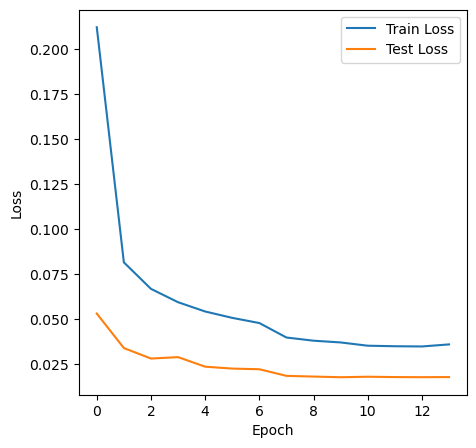

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

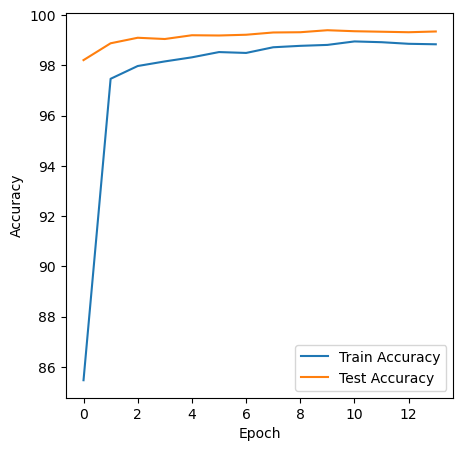

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
